# Internet of Things - First Challenge
Francesco Pastore 10629332

1. Dataset analysis
2. Time estimation
3. Energy consumption
4. Test with different duty cycles

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Parameters

In [2]:
# The duty cycle has been calculated as 32 % 50 + 5 = 37
dutyCycle = 37
dutyCycle_micros = dutyCycle * 10e+5

In [3]:
# The battery capacity has been calculated as 9332 + 5 = 9337
E_battery = 9332 + 5
E_battery_milli = E_battery * 1000
E_battery_milli

9337000

## Dataset analysis

### Deep Sleep with Interrupt

In [4]:
df_deep_sleep = pd.read_csv('deep_sleep.csv')
df_deep_sleep.head()

,Timestamp,Data
0,2024-03-03 20:14:47.705952,59.89
1,2024-03-03 20:14:47.756244,59.50
2,2024-03-03 20:14:47.805842,59.82
3,2024-03-03 20:14:47.856038,59.07
4,2024-03-03 20:14:47.905728,60.11


<AxesSubplot:title={'center':'Deep Sleep with Interrupt'}, xlabel='time', ylabel='P'>

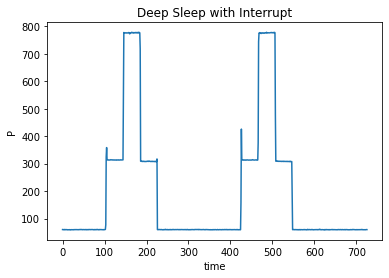

In [5]:
df_deep_sleep.plot(xlabel="time", ylabel="P", title="Deep Sleep with Interrupt", kind="line", legend=False)

In [6]:
# P_i
# Calculate the average power consumption during the idle state
# Values are between 300 and 350
df = df_deep_sleep['Data']
P_i = df[df > 300][df < 350].mean().round(2)
P_i

310.97

In [7]:
# P_dp
# Calculate the average power consumption during the deep sleep state
# Values are below 70
df = df_deep_sleep['Data']
P_dp = df[df < 70].mean().round(2)
P_dp

59.62

### Sensor Reading

In [8]:
df_read_sensor = pd.read_csv('read_sensor.csv')
df_read_sensor.head()

,Timestamp,Data
0,2024-03-03 20:24:46.935040,467.11
1,2024-03-03 20:24:46.984494,466.25
2,2024-03-03 20:24:47.034875,466.68
3,2024-03-03 20:24:47.085240,466.54
4,2024-03-03 20:24:47.134709,466.65


<AxesSubplot:title={'center':'Sensor Reading'}, xlabel='time', ylabel='P'>

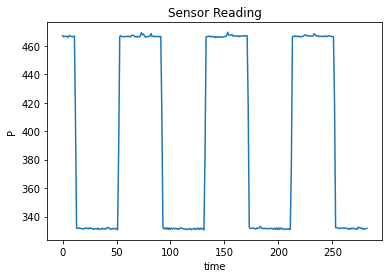

In [9]:
df_read_sensor.plot(xlabel="time", ylabel="P", title="Sensor Reading", kind="line", legend=False)

In [10]:
# P_sr
# Calculate the average power consumption during the sensor reading state
# Values are above 460
df = df_read_sensor['Data']
P_sr = df[df > 460].mean().round(2)
P_sr

466.74

### Transmission power

In [11]:
df_send_different_TX = pd.read_csv('send_different_TX.csv')
df_send_different_TX.head()

,Timestamp,Data
0,2024-03-03 19:04:29.955113,704.75
1,2024-03-03 19:04:30.005088,703.82
2,2024-03-03 19:04:30.054739,704.65
3,2024-03-03 19:04:30.105067,704.07
4,2024-03-03 19:04:30.154501,705.35


<AxesSubplot:title={'center':'Transmission power'}, xlabel='time', ylabel='P'>

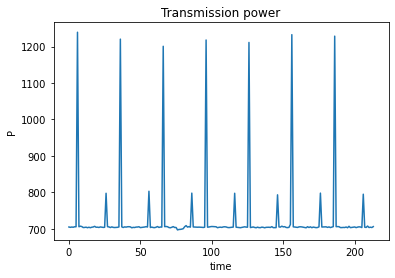

In [12]:
df_send_different_TX.plot(xlabel="time", ylabel="P", title="Transmission power", kind="line", legend=False)

In [13]:
# P_tx
# Calculate the average power consumption during the transmission state at 2 dBm
# Values are between 750 and 850
df = df_send_different_TX['Data']
P_tx = df[df > 750][df < 850].mean().round(2)
P_tx

797.29

In [14]:
# P_wf
# Calculate the average power consumption during the WiFi on state
# Values are below 730
df = df_send_different_TX['Data']
P_wf = df[df < 730].mean().round(2)
P_wf

704.22

### Final results for power consumption

In [15]:
print("P_dp = %.2f mW \t Power in deep sleep state" % P_dp)
print("P_i = %.2f mW \t Power in idle state" % P_i)
print("P_sr = %.2f mW \t Power for sensor reading" % P_sr)
print("P_wf = %.2f mW \t Power when WiFi is on" % P_wf)
print("P_tx = %.2f mW \t Power for trasmission at 2 dBm  " % P_tx)

P_dp = 59.62 mW 	 Power in deep sleep state
P_i = 310.97 mW 	 Power in idle state
P_sr = 466.74 mW 	 Power for sensor reading
P_wf = 704.22 mW 	 Power when WiFi is on
P_tx = 797.29 mW 	 Power for trasmission at 2 dBm  


In [16]:
# Create a dictionary with the calculated powers
# for drawing the power consumption graph
dict_powers = {
    "P_dp": P_dp,
    "P_i": P_i,
    "P_sr": P_sr,
    "P_wf": P_wf,
    "P_tx": P_tx,
}
dict_powers

{'P_dp': 59.62, 'P_i': 310.97, 'P_sr': 466.74, 'P_wf': 704.22, 'P_tx': 797.29}

In [17]:
df_power = pd.DataFrame(dict_powers, index=[0])
df_power

,P_dp,P_i,P_sr,P_wf,P_tx
0,59.62,310.97,466.74,704.22,797.29


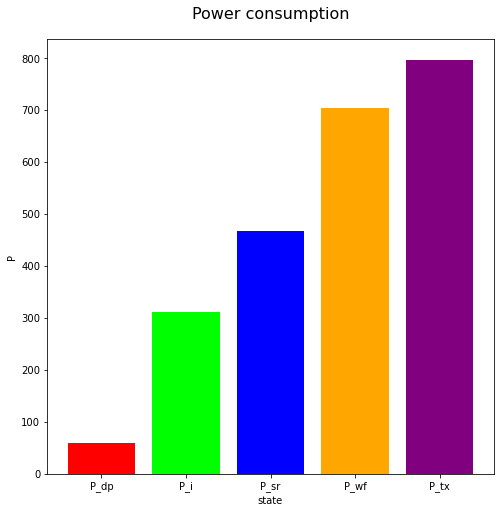

In [18]:
# Extract labels and values from the dictionary
labels = list(dict_powers.keys())
values = list(dict_powers.values())

# Define colors for bars
colors = [(1, 0, 0), (0, 1, 0), (0, 0, 1), (1, 0.65, 0), (0.5, 0, 0.5)]

# Plot pie chart
plt.figure(figsize=(8, 8), facecolor='white')
plt.bar(labels, values, color=colors)

# x-axis represents the states
plt.xlabel('state')

# y-axis represents the power consumption in mW
plt.ylabel('P')

# Set title
plt.title('Power consumption', fontsize=16, pad=20)

# Show plot
plt.show()

## Time Estimation

### Project timing

In [19]:
df_project_time = pd.read_csv('project_time.csv')
df_project_time.head()

,Micros,Step
0,0,Boot
1,310,Sensor Reading On
2,1183,Sensor Reading Off
3,176521,WiFi On
4,177982,TX On


In [20]:
# Calculate the average time for each state
df = df_project_time
df = df.groupby(['Step'])['Micros'].mean().round(2).reset_index()
df = df.sort_values('Micros')
t = pd.Series(data=df['Micros'].values,index=df['Step']).to_dict()
t

{'Boot': 0.0,
 'Sensor Reading On': 378.14,
 'Sensor Reading Off': 1294.38,
 'WiFi On': 246436.24,
 'TX On': 248042.14,
 'TX Off': 248531.43,
 'WiFi Off': 255482.43,
 'Deep sleep': 257070.71}

In [21]:
# The time in idle state is the sum of the time in the three idle states

# 1. From the boot to the sensor reading
T_idle_1 = t['Sensor Reading On']

# 2. From the sensor reading to the WiFi on
T_idle_2 =  t['WiFi On'] - t['Sensor Reading Off']

# 3. From the WiFi on to the deep sleep
T_idle_3 = t['Deep sleep'] - t['WiFi Off']

# Calculate the total time in idle state
T_i = T_idle_1 + T_idle_2 + T_idle_3
T_i = round(T_i, 2)
T_i

247108.28

In [22]:
# The time with wifi on is the sum of the time in the two wifi on states

# 1. From the transmission to the WiFi on
T_WiFi_On_1 = t['TX On'] - t['WiFi On']

# 2. From the WiFi on to the deep sleep
T_WiFi_On_2 = t['WiFi Off'] - t['TX Off']

# Calculate the total time with wifi on
T_wf = T_WiFi_On_1 + T_WiFi_On_2
T_wf = round(T_wf, 2)
T_wf

8556.9

In [23]:
# The time for the sensor reading is the difference between the sensor reading off and on
T_sr = t['Sensor Reading Off'] - t['Sensor Reading On']
T_sr = round(T_sr, 2)
T_sr

916.24

In [24]:
# The time for the transmission is the difference between the transmission off and on
T_tx = t['TX Off'] - t['TX On']
T_tx = round(T_tx, 2)
T_tx

489.29

In [25]:
# Calculate the time spent in deep sleep mode
# as the remaining time after the sum of the other states
T_dp = dutyCycle_micros - t['Deep sleep']
T_dp

36742929.29

In [26]:
# Calculate the active time as the sum of all the states except the deep sleep state
T_active = T_i + T_sr + T_tx + T_wf
T_active

257070.71

In [27]:
# Calculate the total time as the sum of the deep sleep time and the active time
T_tot = T_dp + T_active
T_tot = round(T_tot, 2)
T_tot, T_tot == dutyCycle

(37000000.0, False)

### Final results for time calculation

In [28]:
print("T_i = %.2f us \t Time when the device is idle" % T_i)
print("T_sr = %.2f us \t Time when the device executes a new reading with the sensor" % T_sr)
print("T_wf = %.2f us \t Time when the WiFi is on and no TX" % T_wf)
print("T_tx = %.2f us \t Time for trasmission at 2 dBm" % T_tx)
print("T_active = %.2f us \t Time when the device is active" % T_active)
print("T_dp = %.2f us \t Time when the device is in deep sleep" % T_dp)
print("T_tot = %.2f us \t Total time (duty cycle)" % T_tot)

T_i = 247108.28 us 	 Time when the device is idle
T_sr = 916.24 us 	 Time when the device executes a new reading with the sensor
T_wf = 8556.90 us 	 Time when the WiFi is on and no TX
T_tx = 489.29 us 	 Time for trasmission at 2 dBm
T_active = 257070.71 us 	 Time when the device is active
T_dp = 36742929.29 us 	 Time when the device is in deep sleep
T_tot = 37000000.00 us 	 Total time (duty cycle)


In [29]:
# Create a dictionary with the calculated times
# for drawing the time estimation graph
dict_times = {
    "T_active": T_active,
    "T_dp": T_dp,
}
dict_times

{'T_active': 257070.71, 'T_dp': 36742929.29}

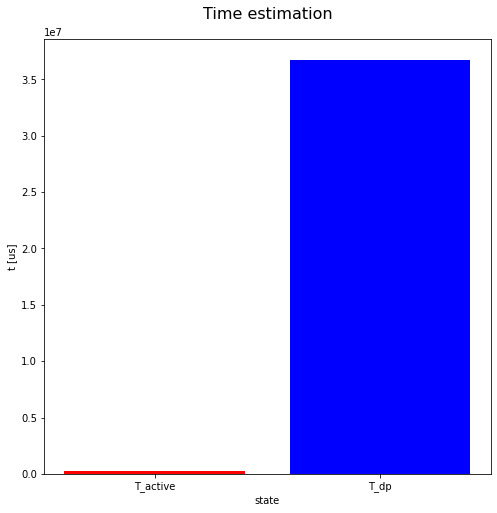

In [30]:
# Extract labels and values from the dictionary
labels = list(dict_times.keys())
values = list(dict_times.values())

# Define colors for bars
colors = [(1, 0, 0), (0, 0, 1)]

# Plot pie chart
plt.figure(figsize=(8, 8), facecolor='white')
plt.bar(labels, values, color=colors)

# Set aspect ratio to be equal to ensure pie is drawn as a circle.
plt.xlabel('state')
plt.ylabel('t [us]')
plt.title('Time estimation', fontsize=16, pad=20)

# Show plot
plt.show()

## Energy consumption

In [31]:
# Calculate the energy consumption for each state
# as the product of the power and the time
E_i = P_i * T_i
E_wf = P_wf * T_wf
E_sr = P_sr * T_sr
E_dp = P_dp * T_dp
E_tx = P_tx * T_tx

In [32]:
# Calculate the total energy in the active state
# as the sum of the energy consumption for each state except the deep sleep state
E_active = E_i + E_sr + E_tx + E_wf
E_active = round(E_active, 2)
E_active

83686953.83

In [33]:
# Calculate the total energy consumption per duty cycle
E_tot = E_active + E_dp

# Convert to mJ
E_tot = E_tot * 10e-7
E_tot = round(E_tot, 2)

E_tot

2274.3

In [34]:
# Calculate the number of cycles that can be executed
# with the available battery capacity
cycles = E_battery_milli / E_tot
cycles = round(cycles)
cycles

4105

In [35]:
# Calculate the number of days that the device can be active
# with the available battery capacity
seconds = cycles * dutyCycle
days = seconds / (60 * 24)
days = round(days)
seconds, days

(151885, 105)

In [36]:
print("E_i = %.2f nJ" % E_i)
print("E_sr = %.2f nJ" % E_sr)
print("E_wf = %.2f nJ" % E_wf)
print("E_tx = %.2f nJ" % E_tx)
print("E_dp = %.2f nJ" % E_dp)
print()
print("E_active = %.2f nJ" % E_active)
print("E_tot = %.2f mJ" % E_tot)

E_i = 76843261.83 nJ
E_sr = 427645.86 nJ
E_wf = 6025940.12 nJ
E_tx = 390106.02 nJ
E_dp = 2190613444.27 nJ

E_active = 83686953.83 nJ
E_tot = 2274.30 mJ


In [37]:
print("Total energy consumption: %.2f J" % E_tot)
print("Battery capacity: %d J" % E_battery)
print("Battery life: %d cycles ~ %d seconds ~ %d days`" % (cycles, seconds, days))

Total energy consumption: 2274.30 J
Battery capacity: 9337 J
Battery life: 4105 cycles ~ 151885 seconds ~ 105 days`


In [38]:
# Create a dictionary with the calculated energies
# for drawing the energy estimation graph
dict_energies = {
    "E_active": E_active,
    "E_dp": E_dp,
}
dict_energies

{'E_active': 83686953.83, 'E_dp': 2190613444.2697997}

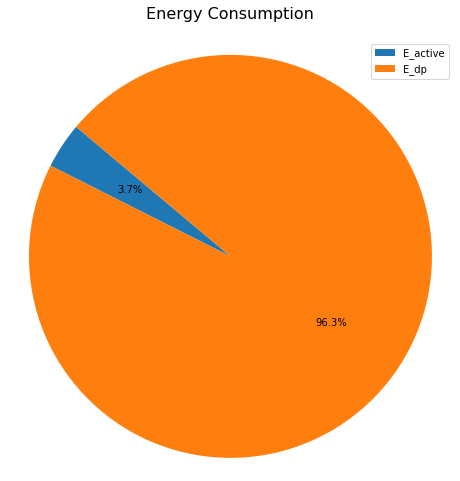

In [39]:
# Extract labels and values from the dictionary
labels = list(dict_energies.keys())
values = list(dict_energies.values())

# Define colors for bars
colors = [(1, 0, 0), (0, 1, 0), (0, 0, 1), (1, 0.65, 0)]

# Plot pie chart
plt.figure(figsize=(8, 8), facecolor='white')
plt.pie(values, autopct='%1.1f%%', startangle=140)

# Set aspect ratio to be equal to ensure pie is drawn as a circle.
plt.axis('equal')

# Add legend
plt.legend(labels, loc="upper right")

# Set title
plt.title('Energy Consumption', fontsize=16, pad=20)

# Show plot
plt.show()

## Test with different duty cycles

In [40]:
times = [60, 90, 120, 150]    

for t_1 in times:
    # Calculate the duty cycle for the new period
    dutyCycle_1 = t_1
    dutyCycle_micros_1 = dutyCycle_1 * 10e+5
    
    # Calculate the time spent in deep sleep mode with the new duty cycle
    T_dp_1 = dutyCycle_micros_1 - t['Deep sleep']
   
    # Calculate the energy consumption for the deep sleep state 
    E_dp_1 = P_dp * T_dp_1
    E_dp_1 = round(E_dp_1, 2)
    
    # Calculate the total energy consumption per duty cycle with the new period
    # Only the deep sleep state changes
    E_tot_1 = E_i + E_wf + E_sr + E_dp_1 + E_tx
    
    # Convert from us to s and from mW to W
    E_tot_1 = E_tot_1 * 10e-7
    E_tot_1 = round(E_tot_1, 2)
    
    # Calculate the number of cycles that can be executed with the available battery capacity
    cycles_1 = E_battery_milli / E_tot_1
    cycles_1 = round(cycles_1)
    
    # Calculate the number of days that the device can be active with the available battery capacity
    seconds_1 = cycles_1 * dutyCycle_1
    
    # Convert from seconds to days
    days_1 = seconds_1 / (60 * 24)
    days_1 = round(days_1, 1)
    
    print("Test with %ds of duty cycle" % t_1)
    print("E_dp = %.2f mJ" % round(E_dp_1 * 10e-7, 2))
    print("E_tot = %.2f mJ" % E_tot_1)
    print("Battery life: %d cycles ~ %d seconds ~ %.1f days" % (cycles_1, seconds_1, days_1))
    print()

Test with 60s of duty cycle
E_dp = 3561.87 mJ
E_tot = 3645.56 mJ
Battery life: 2561 cycles ~ 153660 seconds ~ 106.7 days

Test with 90s of duty cycle
E_dp = 5350.47 mJ
E_tot = 5434.16 mJ
Battery life: 1718 cycles ~ 154620 seconds ~ 107.4 days

Test with 120s of duty cycle
E_dp = 7139.07 mJ
E_tot = 7222.76 mJ
Battery life: 1293 cycles ~ 155160 seconds ~ 107.8 days

Test with 150s of duty cycle
E_dp = 8927.67 mJ
E_tot = 9011.36 mJ
Battery life: 1036 cycles ~ 155400 seconds ~ 107.9 days

